# Capstone : IT Ticket Classfication [SEPT SUN GRP 4B]

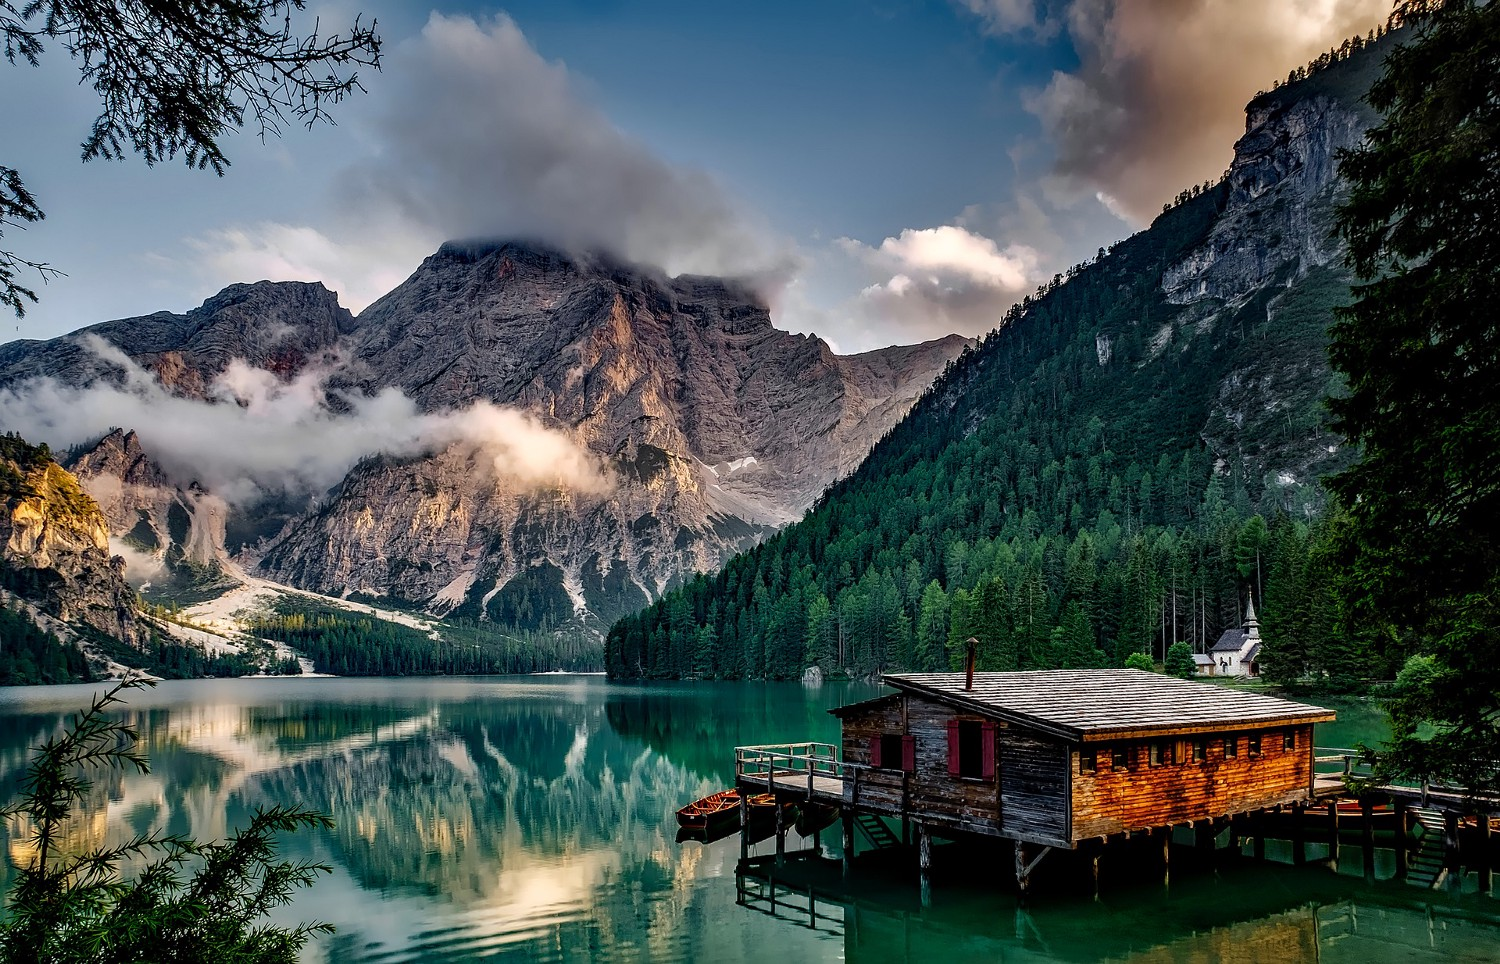

# Aim: Automatic Ticket Assignment [Part 2/6] - Topic Modeling


Build a classifier that can classify the tickets by analyzing text. Classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

## Part 2/6
Word Cloud & Topic Modeling & N-Grams: We have used word cloud to visualize the frequently existing words and have also performed topic modeling (using Gensim LDA Model) to understand the correlated words in the text across the incident reports i.e. grouping the tickets or incidents based on the words used in the text.  We have also tried to plot the number of words used in each of the tickets to study the outliers. 

Word Embedding & Vectorization: We plan to use N-Grams (bi and tri) from the bag of words along with Word2Vec and Glove Embedding for vectorization and preparation of dataset. 


# Import Libraries

In [9]:
import pandas as pd 
import numpy as np 
import re 
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import warnings
import pandas.testing as tm
import spacy  
#import langid 
import nltk

import re, string
from wordcloud import WordCloud
from pprint import pprint

from sklearn.utils import resample
from sklearn import preprocessing

from nltk.corpus import stopwords
from nltk.classify.textcat import TextCat  
from dateutil import parser
from nltk.tokenize import word_tokenize
#from langdetect import detect
from textblob import TextBlob
#from googletrans import Translator

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 

from sklearn.decomposition import LatentDirichletAllocation

from string import punctuation

#import enchant
#from enchant.checker import SpellChecker
    
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from scipy import spatial
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

import logging, warnings
from PIL import Image
from IPython.display import IFrame

##--------------------##

if sys.version_info >= (3, 3) :
    import collections.abc as collections_abc
else:
    import collections as collections_abc
    
from collections import Counter
from collections import OrderedDict
import operator

##-------------------##

plt.style.use('ggplot')
%matplotlib inline

#warnings.filterwarnings("ignore",category=DeprecationWarning)
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [10]:
np.__version__ , pd.__version__,tf.__version__, print(sys.version_info)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


('1.16.1', '1.0.1', '2.0.0', None)

In [11]:
"""
Download required NLTK stopwords corpus if it has not already been downloaded.
Download required NLTK corpora if they have not already been downloaded.
Download the NLTK averaged perceptron tagger that is required for this algorithm to run only if the corpora has not already been downloaded.
Download Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
"""
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True) 

True

# Data Loading

In [12]:
"""
from google.colab import drive
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/Colab Notebooks/'
file_name ='input_data.xlsx'

"""
project_path = 'C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/'
file_name ='itsupportdatacleaned.csv'

In [135]:
data=pd.read_csv(project_path+file_name,encoding=sys.getfilesystemencoding()) 
data.head(2).T

0  \
Short description                                                                login issue   
Description            login issue login issue verify user detail employee manager name c...   
Caller                                                                     spxjnwir pjlcoqds   
Assignment group                                                                       GRP_0   
New_Assignment_Groups                                                                  GRP_0   
Text_length                                                                              204   

                                                                                           1  
Short description                                                                    outlook  
Description            outlook outlook hello team meeting skype meeting etc appear outloo...  
Caller                                                                     hmjdrvpb komuaywn  
Assignment group                                                                       GRP_0  
New_Assignment_Groups                                                                  GRP_0  
Text_length                                                                              142

In [15]:
cols = [0,1,2,3,4,5] #cols = [1,2,3,4,5,6]
data = pd.read_csv(project_path+file_name, usecols=cols)
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [16]:
data.shape #data.info() , #data[data.columns[0]]

(7805, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Short description      7805 non-null   object
 1   Description            7801 non-null   object
 2   Caller                 7805 non-null   object
 3   Assignment group       7805 non-null   object
 4   New_Assignment_Groups  7805 non-null   object
 5   Text_length            7805 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 366.0+ KB


In [18]:
data.describe()

Text_length
count  7805.000000
mean    191.610122
std     327.887363
min       2.000000
25%      69.000000
50%     111.000000
75%     203.000000
max    6256.000000

# Topic Modelling

Typically in a text domain, EDA can have many meanings: What are the topics? How frequent they are? The process will involve some level of preprocessing steps. We analyzed the incidents based on the number of words present in them. We plan to extend its utility in dimensionality reduction in next iteration.  Before doing topic modeling and visualisation, we have also looked into word clouds on most common words or bi grams and tri-grams. we have limited the n value to 3 based on the text length analysis as conducted earlier in the data pre-processing stage. We are also going to use this activity to check which all regular expressions are not working properly or which all patterns are still exising in the word cloud in a prominent manner. 

## Feature Data (Text & Common Words)

In [19]:
data.reset_index(drop=True, inplace =True)

In [20]:
data.tail(2).T

7803  \
Short description                         machine nÃ£o estÃ¡ funcionando   
Description            machine est funcionando machine est funcionand...   
Caller                                                 ufawcgob aowhxjky   
Assignment group                                                  GRP_62   
New_Assignment_Groups                                             GRP_62   
Text_length                                                          123   

                                                                    7804  
Short description      an mehreren pc`s lassen sich verschiedene prgr...  
Description            mehreren pc lassen sich verschiedene prgramdnt...  
Caller                                                 kqvbrspl jyzoklfx  
Assignment group                                                  GRP_49  
New_Assignment_Groups                                             GRP_49  
Text_length                                                          141

In [21]:
data.shape, len(data[data.columns[1]]), len(data[data.columns[1]].values)

((7805, 6), 7805, 7805)

In [22]:
data[data.columns[1]]

0       login issue login issue verify user detail emp...
1       outlook outlook hello team meeting skype meeti...
2       can not log vpn can not log vpn hi can not log...
3       unable access hr tool page unable access hr to...
4                     skype error skype error skype error
                              ...                        
7800    email come zz mail email come zz mail good aft...
7801    telephony software issue telephony software is...
7802    vip windows password reset tifpdchb pedxruyf v...
7803    machine est funcionando machine est funcionand...
7804    mehreren pc lassen sich verschiedene prgramdnt...
Name: Description, Length: 7805, dtype: object

In [23]:
data_text= data[data.columns[1]].values.tolist() # combined text. all text data or feature data from dataset is now in taken in one list
print(data_text[0]),print(data_text[1]) #to process the simple_process gensim package as input needed as string 

login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve
outlook outlook hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind


(None, None)

In [24]:
len(data_text) # extracted the entire feature column into single list

7805

In [25]:
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142

In [26]:
data[data.columns[1]][0]

'login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve'

In [27]:
"""
data.reset_index(drop=True,inplace=True)
data[data.columns[1]] = data[data.columns[1]].str.strip()
data[data.columns[1]] = data[data.columns[1]].str.lower()
data[data.columns[1]] = data[data.columns[1]].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')
data.info()
"""

"\ndata.reset_index(drop=True,inplace=True)\ndata[data.columns[1]] = data[data.columns[1]].str.strip()\ndata[data.columns[1]] = data[data.columns[1]].str.lower()\ndata[data.columns[1]] = data[data.columns[1]].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' ')\ndata.info()\n"

In [28]:
data[data.columns[1]][0]

'login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve'

In [29]:
# from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK Stop words
#stop_words.extend(['from', 'subject', 'com', 're', 'edu', 'received', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [30]:
start = time.time()
for i,text in enumerate(data[data.columns[1]].astype(str)):
    data[data.columns[1]][i] =" ".join(w for w in text.split(' ') if w not in stop_words)
time.sleep(1)
end = time.time()

print(f"Time Taken To Remove Stop Words From Data : {end - start}")

Time Taken To Remove Stop Words From Data : 2.5381081104278564


In [31]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(data[data.columns[1]].astype(str))
corpus[:15]

['login',
 'issue',
 'login',
 'issue',
 'verify',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'check',
 'user',
 'name',
 'ad',
 'reset']

In [32]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'job': 7455,
 'scheduler': 2827,
 'password': 2776,
 'erp': 2604,
 'fail': 2442,
 'please': 2403,
 'tool': 2363,
 'na': 2077,
 'yes': 2027,
 'issue': 1964}

In [33]:
def get_top_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
most_common_uni = get_top_ngrams(data[data.columns[1]],30,1)
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())

temp["Count"] = list(most_common_uni.values())

In [35]:
fig = px.bar(temp, 
             x="Count", 
             y="Common_words", 
             title='Commmon Words in Text', 
             orientation='h', 
             width=900, 
             height=800,
             color='Common_words')
#fig.show() # instead of showing in an interactive manner, saving the grpah as an html file and show the static output
fig.write_html("file.html")
IFrame("file.html", width=950, height=800)

In [36]:
most_common_bi = get_top_ngrams(data[data.columns[1]],30,2)
most_common_bi = dict(most_common_bi)

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())

temp["Count"] = list(most_common_bi.values())

In [37]:
#import kaleido
from IPython.display import HTML
from IPython.display import IFrame
fig = px.bar(temp, 
             x="Count", 
             y="Common_words", 
             title='Commmon Bigrams in Text', 
             orientation='h', 
             width=900, 
             height=800,
             color='Common_words')
#fig.show() # instead of showing in an interactive manner, saving the grpah as an html file and show the static output
fig.write_html("file.html")
IFrame("file.html", width=950, height=800)

In [38]:
most_common_tri = get_top_ngrams(data[data.columns[1]],30,3)
most_common_tri = dict(most_common_tri)

temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())

temp["Count"] = list(most_common_tri.values())

In [39]:
fig = px.bar(temp, 
             x="Count", 
             y="Common_words", 
             title='Commmon Trigrams in Text', 
             orientation='h', 
             width=900, 
             height=800,
             color='Common_words')
#fig.show() # instead of showing in an interactive manner, saving the grpah as an html file and show the static output
fig.write_html("file.html")
IFrame("file.html", width=950, height=800)

# Bi-Grams (Text Cloud)

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams. Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution. Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs. We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [40]:
data_text= data[data.columns[1]].values.tolist() # combined text. all text data or feature data from dataset is now in taken in one list
print(data_text[0]),print(data_text[1]) #to process the simple_process gensim package as input needed as string 

login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve
outlook outlook hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind


(None, None)

In [41]:
def text_to_words(text): #Tokenize Sentences and clean anything not already accounted in clead data if at all
    for sent in text:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) # deacc=True removes punctuation
        yield(sent)

In [42]:
data_words = list(text_to_words(data_text)) # Convert to list of lists. Each incident text is an independed list now.

In [43]:
print(data_words[0]), print(data_words[1])

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller', 'confirm', 'able', 'login', 'issue', 'resolve']
['outlook', 'outlook', 'hello', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


(None, None)

In [44]:
bigram = gensim.models.Phrases(data_words,
                               min_count=5, 
                               threshold=100)  #Build Bi-Gram Model  # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
print(bigram_mod[data_words[0]]) 

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller_confirm', 'able', 'login', 'issue', 'resolve']


In [45]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(data_words)
print(data_words_bigrams[0]), len(data_words_bigrams)

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller_confirm', 'able', 'login', 'issue', 'resolve']


(None, 7805)

In [46]:
wordclouds = ' '.join(map(str, data_words_bigrams)) 
wc = WordCloud(width=1200,
               height=500,
               max_font_size=60,
               background_color="black",
               colormap='gnuplot',
               #max_words=400, 
               min_font_size=10).generate(wordclouds)

plt.figure(figsize=(20,10), facecolor = None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

## Bo-Grams Word Cloud (For Each Assignment Group)

In [47]:
data_bkp = data.copy()
data_wc = data.copy()

In [48]:
data_wc['words'] = data_words_bigrams
data_wc.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   
words                  [login, issue, login, issue, verify, user, det...   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142  
words                  [outlook, outlook, hello, team, meeting, skype...

In [49]:
def wordcloud_grp (group_text, group_name ):
    wordclouds=' '.join(map(str, group_text))
    wc = WordCloud(width=1200, 
                   height=300, 
                   background_color="black",
                   colormap='gnuplot',
                   #collocations=False,
                   max_font_size=60, 
                   #stopwords = stop_words,
                   min_font_size=10, 
                   max_words=50).generate(wordclouds)
    plt.figure(figsize=(18,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(group_name))
    plt.margins(x=0, y=0)
    plt.show()

In [50]:
#Sorting based on frequency of target class Assignment group
value = data_wc[data_wc.columns[4]].value_counts().sort_values(ascending=False).index 
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_29', 'GRP_4', 'GRP_18', 'GRP_16', 'GRP_7', 'GRP_31',
       'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15', 'GRP_42',
       'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11', 'GRP_21', 'GRP_47',
       'GRP_17', 'GRP_23', 'GRP_30', 'GRP_62', 'GRP_27', 'GRP_39', 'GRP_60',
       'GRP_37', 'GRP_44', 'GRP_50', 'GRP_36', 'GRP_65', 'GRP_53', 'GRP_52',
       'GRP_55', 'GRP_51', 'GRP_48', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_68', 'GRP_63', 'GRP_58', 'GRP_56', 'GRP_66', 'GRP_38',
       'GRP_71', 'GRP_57', 'GRP_54', 'GRP_69', 'GRP_72', 'GRP_73', 'GRP_70',
       'GRP_67', 'GRP_64', 'GRP_35', 'GRP_61'],
      dtype='object')

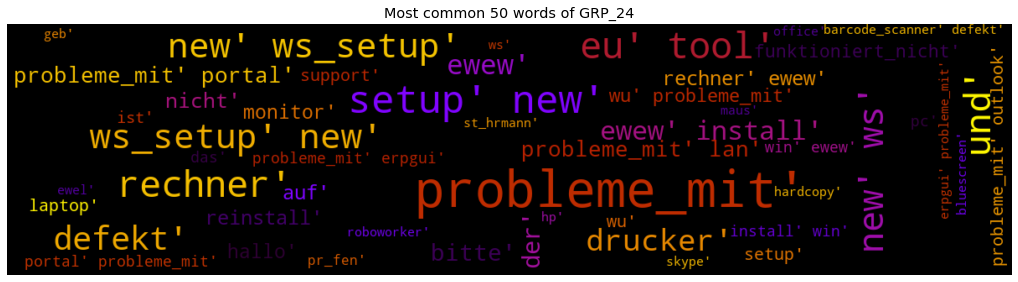

In [51]:
n_a_grps_cld=3  # n_a_grps_cld= data_wc[data_wc.columns[4]].value_counts().count()
for i in range(n_a_grps_cld):
    group_df = data_wc[ data_wc[data_wc.columns[4]] == value[i]] # df slice correspondin to a group 
    group_text = group_df['words'] #all the bigram words from the columns of the same group 
    wordcloud_grp(group_text,value[i])
    wc.to_file(value[i]+'_wordcloud'+'.png')# Save image

# Tri-Grams (Text Cloud)

In [52]:
data_text= data[data.columns[1]].values.tolist() # combined text. all text data or feature data from dataset is now in taken in one list
print(data_text[0]),print(data_text[1]) #to process the simple_process gensim package as input needed as string 

login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve
outlook outlook hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind


(None, None)

Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether. 
Gensim’s simple_preprocess() is great for this. Additionally set deacc=True to remove the punctuations.

In [53]:
def text_to_words(text): #Tokenize Sentences and clean anything not already accounted in clead data if at all
    for sent in text:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) # deacc=True removes punctuation
        yield(sent)

In [54]:
data_words = list(text_to_words(data_text)) # Convert to list of lists. Each incident text is an independed list now.

In [55]:
print(data_words[0]), print(data_words[1])

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller', 'confirm', 'able', 'login', 'issue', 'resolve']
['outlook', 'outlook', 'hello', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


(None, None)

In [56]:
bigram = gensim.models.Phrases(data_words, 
                               min_count=5, 
                               threshold=100)  #Build Bi-Gram Model  # higher threshold fewer phrases.

trigram = gensim.models.Phrases(bigram[data_words], 
                                threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram) # Faster way to get a sentence clubbed as a trigram/bigram

trigram_mod = gensim.models.phrases.Phraser(trigram) # Faster way to get a sentence clubbed as a trigram/bigram

print(trigram_mod[bigram_mod[data_words[0]]]) # See trigram example

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller_confirm_able', 'login', 'issue', 'resolve']


In [57]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_trigrams = make_trigrams(data_words)
print(data_words_trigrams[0])

['login', 'issue', 'login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller_confirm_able', 'login', 'issue', 'resolve']


In [58]:
#mask = np.array(Image.open('upvote.png')) # Import image to np.array
wordclouds = ' '.join(map(str, data_words_trigrams)) 
wc = WordCloud(width=1200, 
               height=500, 
               background_color="black",
               colormap='gnuplot',
               #collocations=False,
               max_font_size=60, 
               max_words=400, 
               stopwords=stop_words,
               #mask=mask,
               min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10),facecolor = None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Tri-Grams Word Cloud (For Each Assignment Group)

In [59]:
data_wc = data.copy()

In [60]:
data_wc['words'] = data_words_trigrams
data_wc.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   
words                  [login, issue, login, issue, verify, user, det...   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142  
words                  [outlook, outlook, hello, team, meeting, skype...

In [61]:
def wordcloud_grp (group_text, group_name ):
    wordclouds=' '.join(map(str, group_text))
    wc = WordCloud(width=1200, 
                   height=300, 
                   background_color="black",
                   colormap='gnuplot',
                   #collocations=False,
                   max_font_size=60, 
                   #stopwords = stop_words,
                   min_font_size=10, 
                   max_words=50).generate(wordclouds)
    plt.figure(figsize=(18,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(group_name))
    plt.margins(x=0, y=0)
    plt.show()

In [62]:
#Sorting based on frequency of target class Assignment group
value = data_wc[data_wc.columns[4]].value_counts().sort_values(ascending=False).index 
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_29', 'GRP_4', 'GRP_18', 'GRP_16', 'GRP_7', 'GRP_31',
       'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15', 'GRP_42',
       'GRP_20', 'GRP_45', 'GRP_1', 'GRP_22', 'GRP_11', 'GRP_21', 'GRP_47',
       'GRP_17', 'GRP_23', 'GRP_30', 'GRP_62', 'GRP_27', 'GRP_39', 'GRP_60',
       'GRP_37', 'GRP_44', 'GRP_50', 'GRP_36', 'GRP_65', 'GRP_53', 'GRP_52',
       'GRP_55', 'GRP_51', 'GRP_48', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_68', 'GRP_63', 'GRP_58', 'GRP_56', 'GRP_66', 'GRP_38',
       'GRP_71', 'GRP_57', 'GRP_54', 'GRP_69', 'GRP_72', 'GRP_73', 'GRP_70',
       'GRP_67', 'GRP_64', 'GRP_35', 'GRP_61'],
      dtype='object')

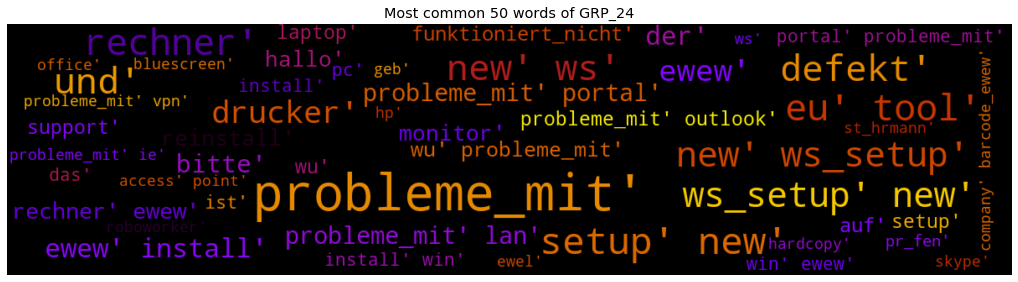

In [63]:
n_a_grps_cld=3  # n_a_grps_cld= data_wc[data_wc.columns[4]].value_counts().count()
for i in range(n_a_grps_cld):
    group_df = data_wc[ data_wc[data_wc.columns[4]] == value[i]] # df slice correspondin to a group 
    group_text = group_df['words'] #all the bigram words from the columns of the same group 
    wordcloud_grp(group_text,value[i])
    wc.to_file(value[i]+'_wordcloud'+'.png')# Save image

# LDA For Topic Modelling

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion. Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution. A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.
The following are key factors to obtaining good segregation topics: The quality of text processin, The variety of topics the text talks about, The choice of topic modeling algorithm, The number of topics fed to the algorithm and The algorithms tuning parameters.

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output. This way, you will know which document belongs predominantly to which topic.

The most representative sentence for each topic: Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic

In [64]:
data_text= data[data.columns[1]].values.tolist() # combined text. all text data or feature data from dataset is now in taken in one list
print(data_text[0]),print(data_text[1]) #to process the simple_process gensim package as input needed as string 

login issue login issue verify user detail employee manager name check user name ad reset password advise user login check caller confirm able login issue resolve
outlook outlook hello team meeting skype meeting etc appear outlook calendar somebody please advise correct kind


(None, None)

In [71]:
stop_words = stopwords.words('english') # NLTK Stop words
#stop_words.extend(['from', 'subject', 're', 'edu', 'received', 'use', 'not', 'com', 'na', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
   # texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [72]:
data_ready = process_words(data_text) # processed Text Data!

In [73]:
id2word = corpora.Dictionary(data_ready) # Create Dictionary #id2word = corpora.Dictionary(text_words_bigrams)

In [74]:
len(id2word), id2word[0], id2word[1], id2word[2], id2word[3] 

(5052, 'able', 'ad', 'detail', 'employee')

In [75]:
corpus = [id2word.doc2bow(text) for text in data_ready] # Create Corpus: Term Document Frequency

In [76]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1)]]


In [77]:
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('able', 1), ('ad', 1), ('detail', 1), ('employee', 1), ('issue', 2), ('manager', 1), ('name', 1), ('resolve', 1), ('user', 2), ('verify', 1)]]


In [78]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=7,
                     random_state=200,
                     update_every=1,
                     chunksize=800,
                     passes=10,
                     alpha='auto', 
                     # iterations=100,
                     per_word_topics=True)

In [79]:
len(lda_model.get_topics()), len(lda_model.get_topics()[0]),

(7, 5052)

In [80]:
lda_model.get_term_topics(lda_model.get_topic_terms(0, topn=5)[0][0])

[(0, 0.08001537)]

In [81]:
pprint(lda_model.print_topics())

[(0,
  '0.080*"tool" + 0.060*"issue" + 0.043*"error" + 0.028*"account" + '
  '0.025*"order" + 0.023*"engineering" + 0.020*"new" + 0.019*"production" + '
  '0.017*"system" + 0.016*"work"'),
 (1,
  '0.039*"email" + 0.036*"help" + 0.029*"file" + 0.026*"create" + 0.019*"work" '
  '+ 0.018*"send" + 0.017*"server" + 0.015*"mail" + 0.014*"team" + '
  '0.013*"good"'),
 (2,
  '0.493*"job" + 0.133*"fail" + 0.132*"scheduler" + 0.037*"abended" + '
  '0.009*"cold" + 0.008*"cell" + 0.008*"failure" + 0.006*"exist" + '
  '0.006*"hostname" + 0.005*"minute"'),
 (3,
  '0.039*"event" + 0.037*"company" + 0.032*"pron" + 0.031*"password" + '
  '0.030*"device" + 0.024*"access" + 0.021*"user" + 0.021*"hostname" + '
  '0.020*"reset" + 0.018*"outside"'),
 (4,
  '0.116*"unable" + 0.031*"open" + 0.029*"printer" + 0.028*"connect" + '
  '0.025*"print" + 0.024*"able" + 0.019*"outlook" + 0.018*"screen" + '
  '0.017*"software" + 0.017*"computer"'),
 (5,
  '0.077*"ticket" + 0.062*"site" + 0.057*"update" + 0.050*"network

In [82]:
doc_lda = lda_model[corpus]

In [83]:
#texts=text_words_bigrams
print('\nPerplexity: ', lda_model.log_perplexity(corpus))   


Perplexity:  -6.014578696406742


In [84]:
coherence_model_lda = CoherenceModel(model=lda_model, texts = data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [85]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49285622236133353


In [86]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.198194 -0.066578       1        1  18.387499
6      0.147807 -0.003109       2        1  16.152952
1      0.138437 -0.034068       3        1  15.121913
3     -0.024759  0.167114       4        1  13.845348
5     -0.221595  0.309055       5        1  13.110142
4      0.103926 -0.081572       6        1  12.354110
2     -0.342011 -0.290842       7        1  11.028033, topic_info=           Term         Freq        Total Category  logprob  loglift
136         job  6258.000000  6258.000000  Default  30.0000  30.0000
147        fail  1685.000000  1685.000000  Default  29.0000  29.0000
148   scheduler  1677.000000  1677.000000  Default  28.0000  28.0000
22       unable  1644.000000  1644.000000  Default  27.0000  27.0000
21         tool  1693.000000  1693.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
77        agent    48.970490   139.223114   Topic7  -5.5570   1.1599
698        disk    31.761152    70.208939   Topic7  -5.9900   1.4115
31     hostname    72.147263   536.765747   Topic7  -5.1695   0.1979
613        long    30.435808    97.074799   Topic7  -6.0326   1.0449
1144      daily    22.997671    45.931946   Topic7  -6.3129   1.5130

[354 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3303      7  0.933239  abend_batch
4606      7  0.976017       abende
4542      7  0.997321      abended
0         1  0.001973         able
0         2  0.319643         able
...     ...       ...          ...
67        5  0.178819         work
67        6  0.190619         work
92        3  0.984803      working
1261      3  0.991490        wrong
729       3  0.985204    yesterday

[448 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 2, 4, 6, 5, 3])

In [87]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=3,
                     random_state=200,
                     update_every=1,
                     chunksize=800,
                     passes=10,
                     alpha='auto', 
                     # iterations=100,
                     per_word_topics=True)

In [88]:
pprint(lda_model.print_topics())

[(0,
  '0.029*"issue" + 0.027*"unable" + 0.027*"tool" + 0.022*"user" + '
  '0.019*"error" + 0.017*"work" + 0.014*"access" + 0.014*"account" + '
  '0.013*"need" + 0.012*"help"'),
 (1,
  '0.031*"ticket" + 0.020*"access" + 0.020*"update" + 0.019*"event" + '
  '0.017*"pron" + 0.017*"email" + 0.015*"company" + 0.015*"device" + '
  '0.012*"hostname" + 0.011*"create"'),
 (2,
  '0.297*"job" + 0.080*"fail" + 0.080*"scheduler" + 0.041*"site" + '
  '0.033*"circuit" + 0.023*"backup" + 0.023*"company" + 0.022*"outage" + '
  '0.022*"network" + 0.022*"abended"')]


In [89]:
doc_lda = lda_model[corpus]

In [90]:
#texts=text_words_bigrams
print('\nPerplexity: ', lda_model.log_perplexity(corpus))   


Perplexity:  -6.055769831046172


In [91]:
coherence_model_lda = CoherenceModel(model=lda_model, texts = data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [92]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5533209023944688


In [93]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.189621  0.192799       1        1  51.567089
1     -0.154083 -0.206563       2        1  30.425667
2      0.343704  0.013764       3        1  18.007248, topic_info=          Term         Freq        Total Category  logprob  loglift
136        job  6153.000000  6153.000000  Default  30.0000  30.0000
147       fail  1656.000000  1656.000000  Default  29.0000  29.0000
148  scheduler  1649.000000  1649.000000  Default  28.0000  28.0000
48        site   938.000000   938.000000  Default  27.0000  27.0000
202    circuit   687.000000   687.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
131    contact   141.648682   404.106689   Topic3  -4.9852   0.6661
95       phone   143.055344   584.363281   Topic3  -4.9754   0.3071
51       reset   139.731705   565.936707   Topic3  -4.9989   0.3156
158      email   146.107574   882.260498   Topic3  -4.9542  -0.0837
67        work   143.641739  1135.517456   Topic3  -4.9713  -0.3531

[177 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4606      3  0.992545   abende
4542      3  0.998982  abended
0         1  0.999681     able
18        1  0.540428   access
18        2  0.459364   access
...     ...       ...      ...
96        3  0.812665   vendor
9         1  0.155374   verify
9         3  0.845232   verify
67        1  0.873610     work
67        3  0.126814     work

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [94]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [95]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

In [96]:
data_ready[0]

['issue',
 'verify',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'user',
 'ad',
 'able',
 'issue',
 'resolve']

In [97]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
pd.options.display.max_colwidth = 70
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(-10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             0.0              0.9874   
1               1             0.0              0.9814   
2               2             0.0              0.8859   
3               3             0.0              0.9899   
4               4             0.0              0.9342   
...           ...             ...                 ...   
7790         7790             1.0              0.9068   
7791         7791             0.0              0.6697   
7792         7792             1.0              0.9728   
7793         7793             0.0              0.8565   
7794         7794             0.0              0.9644   

                                                                   Keywords  \
0       issue, unable, tool, user, error, work, access, account, need, help   
1       issue, unable, tool, user, error, work, access, account, need, help   
2       issue, unable, tool, user, error, work, access, account, need, help   
3       issue, unable, tool, user, error, work, access, account, need, help   
4       issue, unable, tool, user, error, work, access, account, need, help   
...                                                                     ...   
7790  ticket, access, update, event, pron, email, company, device, hostn...   
7791    issue, unable, tool, user, error, work, access, account, need, help   
7792  ticket, access, update, event, pron, email, company, device, hostn...   
7793    issue, unable, tool, user, error, work, access, account, need, help   
7794    issue, unable, tool, user, error, work, access, account, need, help   

                                                                       Text  
0     [issue, verify, user, detail, employee, manager, name, user, ad, a...  
1            [meet, meet, appear, outlook, calendar, advise, correct, kind]  
2                                                                    [well]  
3     [unable, access, hr, tool, page, unable, access, hr, tool, page, u...  
4                                                            [error, error]  
...                                                                     ...  
7790                    [remove, user, remove, user, remove, user, replace]  
7791                                             [ticket, user, user, user]  
7792  [ticket, update, ticket, ticket, update, ticket, ticket, update, t...  
7793  [miss, pc, pc, receive, multiple, window, security, update, early,...  
7794                                      [name, customer, summary, unlock]  

[7795 rows x 5 columns]

In [98]:
data.head(2).T 

0  \
Short description                                                                login issue   
Description            login issue login issue verify user detail employee manager name c...   
Caller                                                                     spxjnwir pjlcoqds   
Assignment group                                                                       GRP_0   
New_Assignment_Groups                                                                  GRP_0   
Text_length                                                                              204   

                                                                                           1  
Short description                                                                    outlook  
Description            outlook outlook hello team meeting skype meeting etc appear outloo...  
Caller                                                                     hmjdrvpb komuaywn  
Assignment group                                                                       GRP_0  
New_Assignment_Groups                                                                  GRP_0  
Text_length                                                                              142

In [99]:
data.reset_index(drop=True, inplace=True)

In [100]:
data['Document_No'] = data.index

In [101]:
data.head(2).T 

0  \
Short description                                                                login issue   
Description            login issue login issue verify user detail employee manager name c...   
Caller                                                                     spxjnwir pjlcoqds   
Assignment group                                                                       GRP_0   
New_Assignment_Groups                                                                  GRP_0   
Text_length                                                                              204   
Document_No                                                                                0   

                                                                                           1  
Short description                                                                    outlook  
Description            outlook outlook hello team meeting skype meeting etc appear outloo...  
Caller                                                                     hmjdrvpb komuaywn  
Assignment group                                                                       GRP_0  
New_Assignment_Groups                                                                  GRP_0  
Text_length                                                                              142  
Document_No                                                                                1

In [102]:
mergedDf = pd.merge(data,df_dominant_topic, how="left", on=["Document_No"])
mergedDf.drop(['Document_No'], axis = 1, inplace=True) 

In [103]:
mergedDf.head(2).T

0  \
Short description                                                                login issue   
Description            login issue login issue verify user detail employee manager name c...   
Caller                                                                     spxjnwir pjlcoqds   
Assignment group                                                                       GRP_0   
New_Assignment_Groups                                                                  GRP_0   
Text_length                                                                              204   
Dominant_Topic                                                                             0   
Topic_Perc_Contrib                                                                    0.9874   
Keywords                 issue, unable, tool, user, error, work, access, account, need, help   
Text                   [issue, verify, user, detail, employee, manager, name, user, ad, a...   

                                                                                           1  
Short description                                                                    outlook  
Description            outlook outlook hello team meeting skype meeting etc appear outloo...  
Caller                                                                     hmjdrvpb komuaywn  
Assignment group                                                                       GRP_0  
New_Assignment_Groups                                                                  GRP_0  
Text_length                                                                              142  
Dominant_Topic                                                                             0  
Topic_Perc_Contrib                                                                    0.9814  
Keywords                 issue, unable, tool, user, error, work, access, account, need, help  
Text                          [meet, meet, appear, outlook, calendar, advise, correct, kind]

In [104]:
data.iloc[0]

Short description                                                                  login issue
Description              login issue login issue verify user detail employee manager name c...
Caller                                                                       spxjnwir pjlcoqds
Assignment group                                                                         GRP_0
New_Assignment_Groups                                                                    GRP_0
Text_length                                                                                204
Document_No                                                                                  0
Name: 0, dtype: object

In [105]:
mergedDf.iloc[0]

Short description                                                                  login issue
Description              login issue login issue verify user detail employee manager name c...
Caller                                                                       spxjnwir pjlcoqds
Assignment group                                                                         GRP_0
New_Assignment_Groups                                                                    GRP_0
Text_length                                                                                204
Dominant_Topic                                                                               0
Topic_Perc_Contrib                                                                      0.9874
Keywords                   issue, unable, tool, user, error, work, access, account, need, help
Text                     [issue, verify, user, detail, employee, manager, name, user, ad, a...
Name: 0, dtype: object

In [106]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 70

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.9977   
1        1.0              0.9993   
2        2.0              0.9948   

                                                                Keywords  \
0    issue, unable, tool, user, error, work, access, account, need, help   
1  ticket, access, update, event, pron, email, company, device, hostn...   
2  job, fail, scheduler, site, circuit, backup, company, outage, netw...   

                                                     Representative Text  
0  [user, internet, get, disconnected, try, open, home, location, use...  
1  [possible, domain, android, possible, domain, android, system, nam...  
2  [circuit, outage, primary, circuit, company, mpls, company, com, c...

Frequency Distribution of Word Counts in Documents : When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

In [107]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(15,7), dpi=90)
plt.hist(doc_lens, bins = 200, color='navy')

plt.text(150, 600, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(150, 560, "Median : " + str(round(np.median(doc_lens))))
plt.text(150, 520, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(150, 480, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(150, 440, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 200), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,200,9))

plt.title('Distribution of Document Word Counts', fontdict=dict(size=13))
plt.show()

In [108]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(15,14), dpi=90, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

#fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

Word Clouds of Top N Keywords in Each Topic : Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

In [118]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)


for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Word Counts of Topic Keywords: When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.
Let’s plot the word counts and the weights of each keyword in the same chart. You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [122]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(12,12), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Sentence Chart Colored by Topic: Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to.
The color of the enclosing rectangle is the topic assigned to the document.

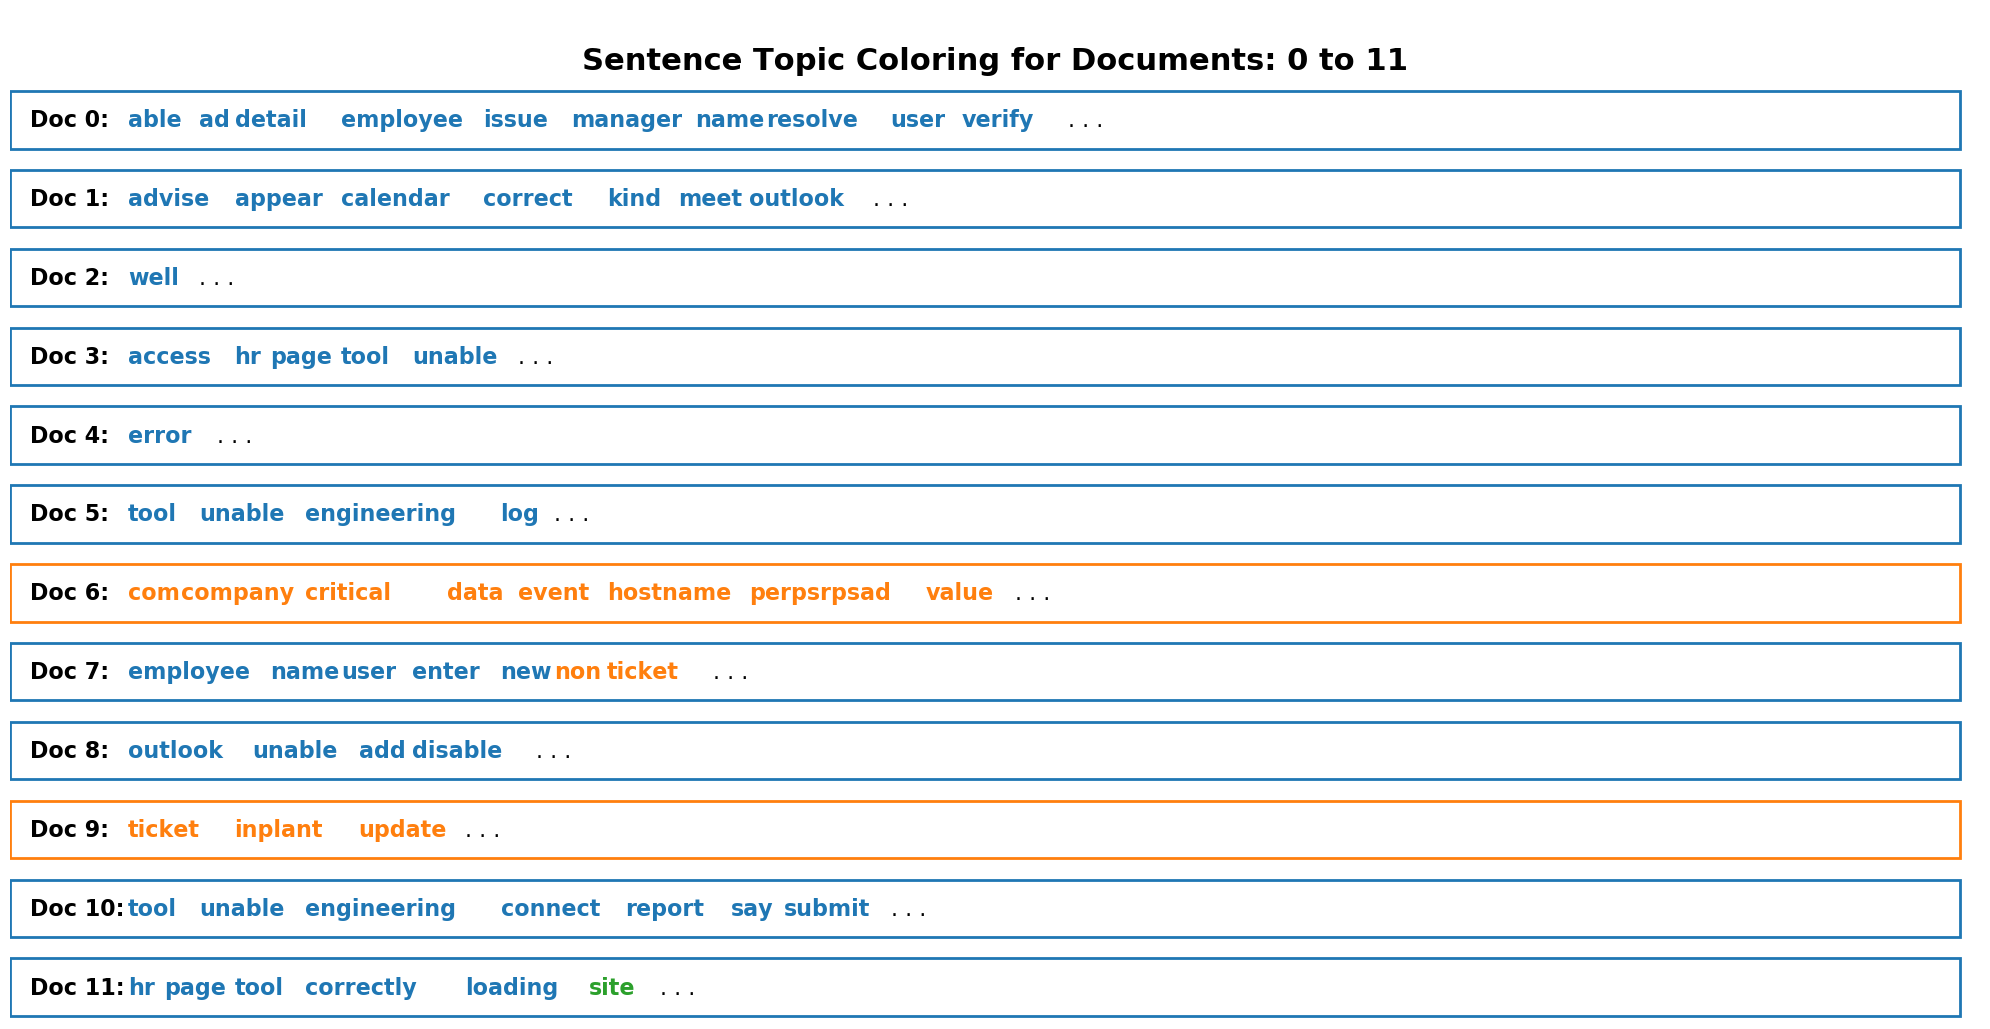

In [128]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.80), dpi=100)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

What are the most discussed topics in the documents? Let’s compute the total number of documents attributed to each topic.

In [129]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

Let’s make two plots: The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents

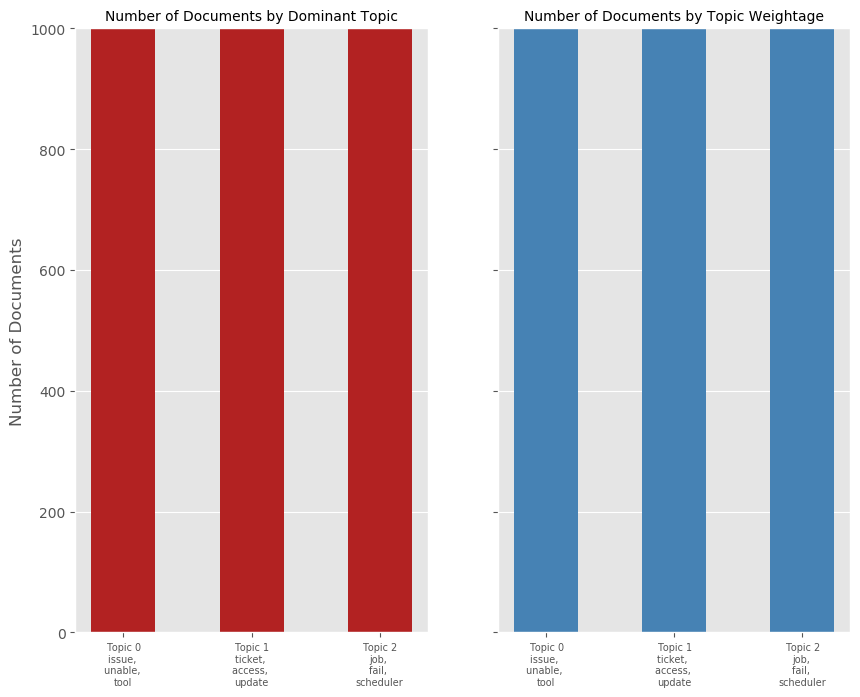

In [130]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8), dpi=100, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.xaxis.set_tick_params(labelsize=7, rotation=0)

ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.xaxis.set_tick_params(labelsize=7, rotation=0)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

 t-SNE Clustering Chart: Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm

In [131]:
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7805 samples in 0.123s...
[t-SNE] Computed neighbors for 7805 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7805
[t-SNE] Computed conditional probabilities for sample 2000 / 7805
[t-SNE] Computed conditional probabilities for sample 3000 / 7805
[t-SNE] Computed conditional probabilities for sample 4000 / 7805
[t-SNE] Computed conditional probabilities for sample 5000 / 7805
[t-SNE] Computed conditional probabilities for sample 6000 / 7805
[t-SNE] Computed conditional probabilities for sample 7000 / 7805
[t-SNE] Computed conditional probabilities for sample 7805 / 7805
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.278801
[t-SNE] KL divergence after 1000 iterations: 0.310416


Loading BokehJS ...

In [133]:
mergedDf.to_csv(project_path+"itsupportdatacleaned_2.csv" , index=False)

In [134]:
mergedDf.head(2).T

0  \
Short description                                                                login issue   
Description            login issue login issue verify user detail employee manager name c...   
Caller                                                                     spxjnwir pjlcoqds   
Assignment group                                                                       GRP_0   
New_Assignment_Groups                                                                  GRP_0   
Text_length                                                                              204   
Dominant_Topic                                                                             0   
Topic_Perc_Contrib                                                                    0.9874   
Keywords                 issue, unable, tool, user, error, work, access, account, need, help   
Text                   [issue, verify, user, detail, employee, manager, name, user, ad, a...   

                                                                                           1  
Short description                                                                    outlook  
Description            outlook outlook hello team meeting skype meeting etc appear outloo...  
Caller                                                                     hmjdrvpb komuaywn  
Assignment group                                                                       GRP_0  
New_Assignment_Groups                                                                  GRP_0  
Text_length                                                                              142  
Dominant_Topic                                                                             0  
Topic_Perc_Contrib                                                                    0.9814  
Keywords                 issue, unable, tool, user, error, work, access, account, need, help  
Text                          [meet, meet, appear, outlook, calendar, advise, correct, kind]

## Conclusion: 
We started from scratch by importing, cleaning and processing the  dataset to build the LDA model. Then we saw multiple ways to visualize the outputs of topic models including the word clouds and sentence coloring, which intuitively tells you what topic is dominant in each topic. A t-SNE clustering and the pyLDAVis are provide more details into the clustering of the topics.we can chek the same with scikit learn, we can build and grid search topic models using scikit learn as well.

## Summary:
Word Cloud & Topic Modeling & N-Grams: We have used word cloud to visualize the frequently existing words and have also performed topic modeling (using Gensim LDA Model) to understand the correlated words in the text across the incident reports i.e. grouping the tickets or incidents based on the words used in the text.  We have also tried to plot the number of words used in each of the tickets to study the outliers. 

Word Embedding & Vectorization: We have used N-Grams (bi and tri) from the bag of words along with Word2Vec and Glove Embedding for vectorization and preparation of dataset. 
